In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
from everything import do_everything_before, do_everything_between, do_everything_after, get_train_command, get_test_ssim_psnr
import numpy as np
import os
import torch
from srcnn_files.srcnn import SRCNN
import matplotlib.pyplot as plt
from PIL import Image
from interpolate import linear_interpolate
from scipy import fft
import tifffile

In [18]:
MODEL_DIR = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/pretrained_model/"

test_1 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.0655_tiled/"
seg_1 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.0655_tiled_pretrained_segmentations/"

TEST_DIR_TILED_90  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.0728_tiled/"
TEST_DIR_TILED_60  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1092_linear_tiled/"
TEST_DIR_TILED_40  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1638_linear_tiled/"
TEST_DIR_TILED_30  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.2184_linear_tiled/"
TEST_DIR_TILED_20  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear_tiled/"

SEG_TEST_DIR_90    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.0728_linear_tiled_pretrained_segmentations/"
SEG_TEST_DIR_60    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1092_linear_tiled_pretrained_segmentations/"
SEG_TEST_DIR_40    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1638_linear_tiled_pretrained_segmentations/"
SEG_TEST_DIR_30    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.2184_linear_tiled_pretrained_segmentations/"
SEG_TEST_DIR_20    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear_tiled_pretrained_segmentations/"

folder already exists: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/second_trial/omnipose_training/test/pmc_0.0655_tiled_pretrained_segmentations/
length of masks: 5, 5
Using model: C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/pretrained_model/models\bact_phase_omnitorch_0.pt
2023-05-24 11:53:14,486 [INFO] ** TORCH GPU version installed and working. **
2023-05-24 11:53:14,487 [INFO] >>>> using GPU
2023-05-24 11:53:19,133 [INFO] 100%|##########| 5/5 [00:04<00:00,  1.13it/s]


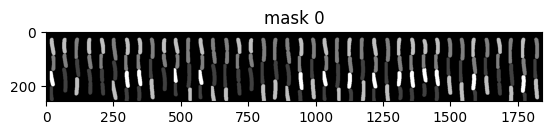

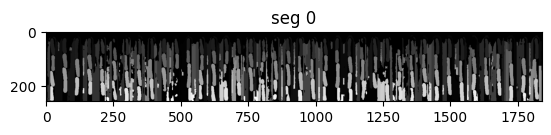

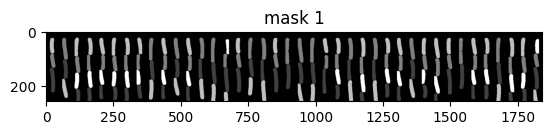

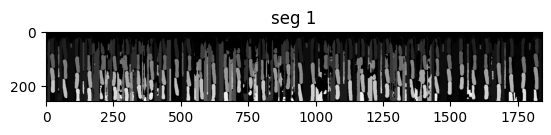

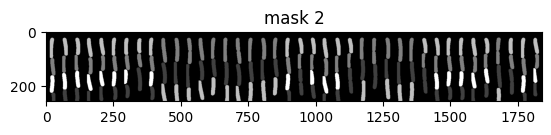

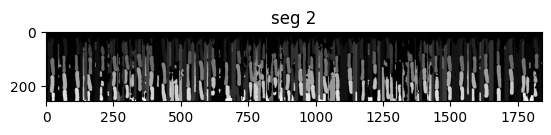

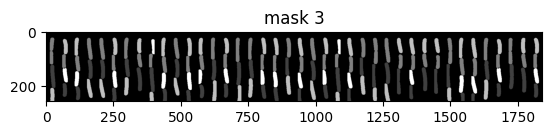

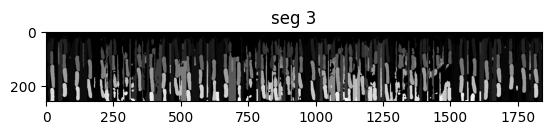

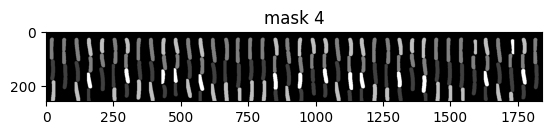

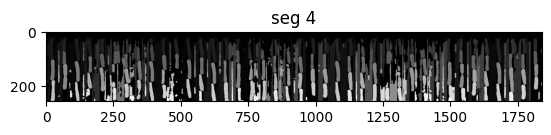

In [30]:
output_1 = do_everything_after(MODEL_DIR,test_1,seg_1)
percarr_1,cells_1,dists_1,duplicates_1,indices_1, excessarr_1 = output_1

In [29]:
excessarr_1

array([4067, 2885,   28, ...,  621,   24,  107], dtype=int64)

In [ ]:
output_90_linear = do_everything_after(MODEL_DIR,TEST_DIR_TILED_90,SEG_TEST_DIR_90)
percarr_90_linear,cells_90_linear,dists_90_linear,duplicates_90_linear,indices_90_linear = output_90_linear

In [ ]:
output_60_linear = do_everything_after(MODEL_DIR,TEST_DIR_TILED_60,SEG_TEST_DIR_60)
percarr_60_linear,cells_60_linear,dists_60_linear,duplicates_60_linear,indices_60_linear = output_60_linear

In [ ]:
output_40_linear = do_everything_after(MODEL_DIR,TEST_DIR_TILED_40,SEG_TEST_DIR_40)
percarr_40_linear,cells_40_linear,dists_40_linear,duplicates_40_linear,indices_40_linear = output_40_linear

In [ ]:
output_30_linear = do_everything_after(MODEL_DIR,TEST_DIR_TILED_30,SEG_TEST_DIR_30)
percarr_30_linear,cells_30_linear,dists_30_linear,duplicates_30_linear,indices_30_linear = output_30_linear

In [ ]:
output_20_linear = do_everything_after(MODEL_DIR,TEST_DIR_TILED_20,SEG_TEST_DIR_20)
percarr_20_linear,cells_20_linear,dists_20_linear,duplicates_20_linear,indices_20_linear = output_20_linear

In [ ]:
SR_TRAIN_DIR_TILED_60 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/train/pmc_0.1092_linear_SR_tiled/"
SR_TRAIN_DIR_TILED_40 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/train/pmc_0.1638_linear_SR_tiled/"
SR_TRAIN_DIR_TILED_30 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/train/pmc_0.2184_linear_SR_tiled/"
SR_TRAIN_DIR_TILED_20 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/train/pmc_0.3276_linear_SR_tiled/"

SR_TEST_DIR_TILED_60  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1092_linear_SR_tiled/"
SR_TEST_DIR_TILED_40  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1638_linear_SR_tiled/"
SR_TEST_DIR_TILED_30  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.2184_linear_SR_tiled/"
SR_TEST_DIR_TILED_20  = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear_SR_tiled/"

SR_SEG_TEST_DIR_60    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1092_linear_SR_tiled_90x_segmentations/"
SR_SEG_TEST_DIR_40    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1638_linear_SR_tiled_90x_segmentations/"
SR_SEG_TEST_DIR_30    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.2184_linear_SR_tiled_90x_segmentations/"
SR_SEG_TEST_DIR_20    = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear_SR_tiled_90x_segmentations/"

In [ ]:
output_60_sr_linear = do_everything_after(MODEL_DIR,SR_TEST_DIR_TILED_60,SR_SEG_TEST_DIR_60)
percarr_60_sr_linear,cells_60_sr_linear,dists_60_sr_linear,duplicates_60_sr_linear,indices_60_sr_linear = output_60_sr_linear

In [ ]:
output_40_sr_linear = do_everything_after(MODEL_DIR,SR_TEST_DIR_TILED_40,SR_SEG_TEST_DIR_40)
percarr_40_sr_linear,cells_40_sr_linear,dists_40_sr_linear,duplicates_40_sr_linear,indices_40_sr_linear = output_40_sr_linear

In [ ]:
output_30_sr_linear = do_everything_after(MODEL_DIR,SR_TEST_DIR_TILED_30,SR_SEG_TEST_DIR_30)
percarr_30_sr_linear,cells_30_sr_linear,dists_30_sr_linear,duplicates_30_sr_linear,indices_30_sr_linear = output_30_sr_linear

In [ ]:
output_20_sr_linear = do_everything_after(MODEL_DIR,SR_TEST_DIR_TILED_20,SR_SEG_TEST_DIR_20)
percarr_20_sr_linear,cells_20_sr_linear,dists_20_sr_linear,duplicates_20_sr_linear,indices_20_sr_linear = output_20_sr_linear

In [ ]:
np.argsort(percarr_60_linear)[0],np.argsort(percarr_60_linear)[4],np.argsort(percarr_60_linear)[6],np.argsort(percarr_60_linear)[7]

In [ ]:
percarr_40_sr_linear[np.argsort(percarr_40_linear)]

In [ ]:
plt.plot(np.sort(percarr_60_sr_linear-percarr_60_linear))
plt.plot([0,700],[0,0],color="black")
plt.show()

In [ ]:
print(np.mean(percarr_40_linear))
print(np.mean(percarr_60_linear))
print(np.mean(percarr_40_sr_linear))
print(np.mean(percarr_60_sr_linear))

In [ ]:
fig, axs = plt.subplots(2,1,figsize=(14,6))
axs[0].plot(np.sort(percarr_90_linear),"-",label="90x",color="black")
axs[0].plot(np.sort(percarr_60_linear),"--",label="linear 60x",color="green")
axs[0].plot(np.sort(percarr_40_linear),"--",label="linear 40x",color="cyan")
axs[0].plot(np.sort(percarr_30_linear),"--",label="linear 30x",color="blue")
axs[0].plot(np.sort(percarr_20_linear),"--",label="linear 20x",color="purple")
axs[0].set_title("IoU accuracy for different resolutions")
axs[0].set_ylabel("IoU accuracy")
axs[0].set_xlabel("cells in test set")
axs[0].legend(loc=[1.02,0.3])

xx = [20,30,40,60,90]
yy = [percarr_20_linear,percarr_30_linear,percarr_40_linear,percarr_60_linear,percarr_90_linear]

axs[1].set_title("IoU accuracy against Magnification")
axs[1].errorbar(xx,[np.mean(y) for y in yy],[np.std(y) for y in yy],linestyle="--",ecolor='C0',elinewidth=0.6,capsize=3,marker='x',label='ID accuracy',color='C0')
axs[1].plot([15,105],[1,1],color='black',linewidth=0.6)
axs[1].plot([15,105],[0.8,0.8],color='black',linewidth=0.6)
axs[1].plot([15,105],[0.6,0.6],color='black',linewidth=0.6)
axs[1].plot([15,105],[0.4,0.4],color='black',linewidth=0.6)
axs[1].plot([15,105],[0.2,0.2],color='black',linewidth=0.6)
axs[1].plot([15,105],[0.1,0.1],color='black',linewidth=0.6)
axs[1].plot([15,105],[0.3,0.3],color='black',linewidth=0.6)
axs[1].plot([15,105],[0.9,0.9],color='black',linewidth=0.6)
axs[1].plot([15,105],[0.7,0.7],color='black',linewidth=0.6)
axs[1].plot([15,105],[0.5,0.5],color='black',linewidth=0.6)
axs[1].set_ylabel("Mean IoU accuracy")
axs[1].set_xlabel("Magnification")
axs[1].set_ylim(0,1.1)
axs[1].set_xlim(15,95)
fig.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(2,1,figsize=(14,6))
axs[0].plot(np.sort(percarr_90_linear),"-",label="90x",color="black")
axs[0].plot(np.sort(percarr_60_sr_linear),"-",label="SR 60x",color="green")
axs[0].plot(np.sort(percarr_40_sr_linear),"-",label="SR 40x",color="cyan")
axs[0].plot(np.sort(percarr_30_sr_linear),"-",label="SR 30x",color="blue")
axs[0].plot(np.sort(percarr_20_sr_linear),"-",label="SR 20x",color="purple")
axs[0].plot(np.sort(percarr_60_linear),"--",label="linear 60x",color="green")
axs[0].plot(np.sort(percarr_40_linear),"--",label="linear 40x",color="cyan")
axs[0].plot(np.sort(percarr_30_linear),"--",label="linear 30x",color="blue")
axs[0].plot(np.sort(percarr_20_linear),"--",label="linear 20x",color="purple")
axs[0].set_title("IoU accuracy for different image types")
axs[0].set_ylabel("IoU accuracy")
axs[0].set_xlabel("cells in test set")
axs[0].legend(loc=[1.02,0.1])

xx = [20,30,40,60,90]
yy = [percarr_20_linear,percarr_30_linear,percarr_40_linear,percarr_60_linear,percarr_90_linear]
yy2 = [percarr_20_sr_linear,percarr_30_sr_linear,percarr_40_sr_linear,percarr_60_sr_linear,percarr_90_linear]

axs[1].set_title("IoU accuracy against Magnification")
axs[1].errorbar(xx,[np.mean(y) for y in yy2],[np.std(y) for y in yy2],linestyle="-",ecolor='C2',elinewidth=0.6,capsize=3,marker='x',label='SR',color='C2')
axs[1].errorbar(xx,[np.mean(y) for y in yy],[np.std(y) for y in yy],linestyle="--",ecolor='C0',elinewidth=0.6,capsize=3,marker='x',label='linear',color='C0')
axs[1].plot([15,105],[1,1],color='black',linewidth=0.6)
axs[1].plot([15,105],[0.8,0.8],color='black',linewidth=0.6)
axs[1].plot([15,105],[0.6,0.6],color='black',linewidth=0.6)
axs[1].plot([15,105],[0.4,0.4],color='black',linewidth=0.6)
axs[1].plot([15,105],[0.2,0.2],color='black',linewidth=0.6)
axs[1].plot([15,105],[0.1,0.1],color='black',linewidth=0.6)
axs[1].plot([15,105],[0.3,0.3],color='black',linewidth=0.6)
axs[1].plot([15,105],[0.9,0.9],color='black',linewidth=0.6)
axs[1].plot([15,105],[0.7,0.7],color='black',linewidth=0.6)
axs[1].plot([15,105],[0.5,0.5],color='black',linewidth=0.6)
axs[1].set_ylabel("Mean IoU accuracy")
axs[1].set_xlabel("Magnification")
axs[1].set_ylim(0,1.1)
axs[1].set_xlim(15,95)
axs[1].legend(loc=[1.02,0.6])
fig.tight_layout()
plt.show()

In [ ]:
s

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(14,4))
axs[0].plot(np.sort(percarr_90_linear),"-",label="90x",color="black")
axs[0].plot(np.sort(percarr_60_sr_linear),"-",label="SR 60x",color="green")
axs[0].plot(np.sort(percarr_40_sr_linear),"-",label="SR 40x",color="cyan")
axs[0].plot(np.sort(percarr_30_sr_linear),"-",label="SR 30x",color="blue")
axs[0].plot(np.sort(percarr_20_sr_linear),"-",label="SR 20x",color="purple")
axs[0].plot(np.sort(percarr_60_linear),"--",label="linear 60x",color="green")
axs[0].plot(np.sort(percarr_40_linear),"--",label="linear 40x",color="cyan")
axs[0].plot(np.sort(percarr_30_linear),"--",label="linear 30x",color="blue")
axs[0].plot(np.sort(percarr_20_linear),"--",label="linear 20x",color="purple")
axs[0].set_title("IoU accuracy for different image types")
axs[0].set_ylabel("IoU accuracy")
# axs[0].set_ylim(0.8,1)
axs[0].legend(loc=[1.02,0.3])
axs[1].plot(np.sort(dists_90_linear),"-",label="90x",color="black")
axs[1].plot(np.sort(dists_60_sr_linear),"-",label="SR 60x",color="green")
axs[1].plot(np.sort(dists_40_sr_linear),"-",label="SR 40x",color="cyan")
axs[1].plot(np.sort(dists_30_sr_linear),"-",label="SR 30x",color="blue")
axs[1].plot(np.sort(dists_20_sr_linear),"-",label="SR 20x",color="purple")
axs[1].plot(np.sort(dists_60_linear),"--",label="linear 60x",color="green")
axs[1].plot(np.sort(dists_40_linear),"--",label="linear 40x",color="cyan")
axs[1].plot(np.sort(dists_30_linear),"--",label="linear 30x",color="blue")
axs[1].plot(np.sort(dists_20_linear),"--",label="linear 20x",color="purple")
axs[1].set_title("centroid distances for different image types")
axs[1].set_ylabel("distance (pixels)")
axs[1].set_ylim(0,5)
axs[1].legend(loc=[1.02,0.3])
fig.tight_layout()
plt.show()

In [ ]:
HR_IMAGES_DIR_90 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.0728/convolutions/"
SR_IMAGES_DIR_60 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1092_linear_SR/"
SR_IMAGES_DIR_40 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1638_linear_SR/"
SR_IMAGES_DIR_30 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.2184_linear_SR/"
SR_IMAGES_DIR_20 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear_SR/"
LINEAR_IMAGES_DIR_60 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1092_linear/"
LINEAR_IMAGES_DIR_40 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1638_linear/"
LINEAR_IMAGES_DIR_30 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.2184_linear/"
LINEAR_IMAGES_DIR_20 = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear/"

In [ ]:
ssim_list_60, psnr_list_60 = get_test_ssim_psnr(HR_IMAGES_DIR_90,SR_IMAGES_DIR_60)
ssim_list_40, psnr_list_40 = get_test_ssim_psnr(HR_IMAGES_DIR_90,SR_IMAGES_DIR_40)
ssim_list_30, psnr_list_30 = get_test_ssim_psnr(HR_IMAGES_DIR_90,SR_IMAGES_DIR_30)
ssim_list_20, psnr_list_20 = get_test_ssim_psnr(HR_IMAGES_DIR_90,SR_IMAGES_DIR_20)

ssim_list_60_linear, psnr_list_60_linear = get_test_ssim_psnr(HR_IMAGES_DIR_90,LINEAR_IMAGES_DIR_60)
ssim_list_40_linear, psnr_list_40_linear = get_test_ssim_psnr(HR_IMAGES_DIR_90,LINEAR_IMAGES_DIR_40)
ssim_list_30_linear, psnr_list_30_linear = get_test_ssim_psnr(HR_IMAGES_DIR_90,LINEAR_IMAGES_DIR_30)
ssim_list_20_linear, psnr_list_20_linear = get_test_ssim_psnr(HR_IMAGES_DIR_90,LINEAR_IMAGES_DIR_20)

In [ ]:
fig, axs = plt.subplots(2,1,figsize=(14,6))
axs[0].plot(np.sort(ssim_list_60),label="SR 60x",color="green")
axs[0].plot(np.sort(ssim_list_40),label="SR 40x",color="cyan")
axs[0].plot(np.sort(ssim_list_30),label="SR 30x",color="blue")
axs[0].plot(np.sort(ssim_list_20),label="SR 20x",color="purple")
axs[0].plot(np.sort(ssim_list_60_linear),"--",label="linear 60x",color="green")
axs[0].plot(np.sort(ssim_list_40_linear),"--",label="linear 40x",color="cyan")
axs[0].plot(np.sort(ssim_list_30_linear),"--",label="linear 30x",color="blue")
axs[0].plot(np.sort(ssim_list_20_linear),"--",label="linear 20x",color="purple")
axs[0].set_xlabel("image number")
axs[0].set_ylabel("SSIM")
axs[0].set_title("SSIM for SR models and linear upsample")
axs[0].legend(loc=[1.02,0.2])
axs[0].set_ylim(0,1)

xx = [20,30,40,60]
yy = [ssim_list_20_linear,ssim_list_30_linear,ssim_list_40_linear,ssim_list_60_linear]
yy2 = [ssim_list_20,ssim_list_30,ssim_list_40,ssim_list_60]

axs[1].set_title("SSIM against Magnification")
axs[1].errorbar(xx,[np.mean(y) for y in yy2],[np.std(y) for y in yy2],linestyle="-",ecolor='C2',elinewidth=0.6,capsize=3,marker='x',label='SR',color='C2')
axs[1].errorbar(xx,[np.mean(y) for y in yy],[np.std(y) for y in yy],linestyle="--",ecolor='C0',elinewidth=0.6,capsize=3,marker='x',label='linear',color='C0')
axs[1].plot([15,105],[1,1],color='black',linewidth=0.6)
axs[1].plot([15,105],[0.8,0.8],color='black',linewidth=0.6)
axs[1].plot([15,105],[0.6,0.6],color='black',linewidth=0.6)
axs[1].plot([15,105],[0.4,0.4],color='black',linewidth=0.6)
axs[1].plot([15,105],[0.2,0.2],color='black',linewidth=0.6)
axs[1].plot([15,105],[0.1,0.1],color='black',linewidth=0.6)
axs[1].plot([15,105],[0.3,0.3],color='black',linewidth=0.6)
axs[1].plot([15,105],[0.9,0.9],color='black',linewidth=0.6)
axs[1].plot([15,105],[0.7,0.7],color='black',linewidth=0.6)
axs[1].plot([15,105],[0.5,0.5],color='black',linewidth=0.6)
axs[1].set_ylabel("Mean SSIM accuracy")
axs[1].set_xlabel("Magnification")
axs[1].set_ylim(0,1)
axs[1].set_xlim(15,65)
axs[1].legend(loc=[1.02,0.6])
fig.tight_layout()
plt.show()

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(14,5))
axs[0].plot(np.sort(ssim_list_60),label="SR 60x",color="green")
axs[0].plot(np.sort(ssim_list_40),label="SR 40x",color="cyan")
axs[0].plot(np.sort(ssim_list_30),label="SR 30x",color="blue")
axs[0].plot(np.sort(ssim_list_20),label="SR 20x",color="purple")
axs[0].plot(np.sort(ssim_list_60_linear),"--",label="linear 60x",color="green")
axs[0].plot(np.sort(ssim_list_40_linear),"--",label="linear 40x",color="cyan")
axs[0].plot(np.sort(ssim_list_30_linear),"--",label="linear 30x",color="blue")
axs[0].plot(np.sort(ssim_list_20_linear),"--",label="linear 20x",color="purple")
axs[0].set_xlabel("image number")
axs[0].set_ylabel("ssim")
axs[0].set_title("SSIM for SR models and linear upsample")
axs[0].legend(loc=[1.02,0.5])
axs[0].set_ylim(0,1)

axs[1].plot(np.sort(psnr_list_60),label="SR 60x",color="green")
axs[1].plot(np.sort(psnr_list_40),label="SR 40x",color="cyan")
axs[1].plot(np.sort(psnr_list_30),label="SR 30x",color="blue")
axs[1].plot(np.sort(psnr_list_20),label="SR 20x",color="purple")
axs[1].plot(np.sort(psnr_list_60_linear),"--",label="linear 60x",color="green")
axs[1].plot(np.sort(psnr_list_40_linear),"--",label="linear 40x",color="cyan")
axs[1].plot(np.sort(psnr_list_30_linear),"--",label="linear 30x",color="blue")
axs[1].plot(np.sort(psnr_list_20_linear),"--",label="linear 20x",color="purple")
axs[1].set_xlabel("image number")
axs[1].set_ylabel("psnr")
axs[1].set_title("PSNR for SR models and linear upsample")
axs[1].legend(loc=[1.02,0.5])
fig.tight_layout()
plt.show()

In [ ]:
output_60_sr_linear_list = []
for i in range(len(os.listdir(SR_TRAIN_DIR_TILED_60+"models"))):
    temp_output_60_sr_linear = do_everything_after(SR_TRAIN_DIR_TILED_60,SR_TEST_DIR_TILED_60,SR_SEG_TEST_DIR_60,model_number=i)
    output_60_sr_linear_list.append(temp_output_60_sr_linear)

In [ ]:
output_40_sr_linear_list = []
for i in range(len(os.listdir(SR_TRAIN_DIR_TILED_40+"models"))):
    temp_output_40_sr_linear = do_everything_after(SR_TRAIN_DIR_TILED_40,SR_TEST_DIR_TILED_40,SR_SEG_TEST_DIR_40,model_number=i)
    output_40_sr_linear_list.append(temp_output_40_sr_linear)

In [ ]:
num=10
colors = np.vstack((np.linspace(0,0.9,num),np.linspace(0,0.9,num),np.linspace(0,0.9,num))).T
colors.shape

In [ ]:
output_40_sr_linear_list[0][4]

In [ ]:
for i,val in enumerate(output_60_linear_list):
    print(i+10, np.mean(val[0]))

In [ ]:
for i,val in enumerate(output_40_sr_linear_list):
    print(i, np.mean(val[0]))

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(10,8))
for i in range(10,20):
    axs[0][0].plot(np.sort(output_40_sr_linear_list[i][0]),color=colors[i-num])
    axs[0][1].plot(np.sort(output_40_sr_linear_list[i][2]),color=colors[i-num])
    axs[1][0].plot(np.sort(output_60_sr_linear_list[i][0]),color=colors[i-num])
    axs[1][1].plot(np.sort(output_60_sr_linear_list[i][2]),color=colors[i-num])


axs[0][0].set_title("IoU accuracy for different training amounts, 40x SR")
axs[0][0].set_ylabel("IoU accuracy")
axs[0][1].set_title("centroid distances for different training amounts, 40x SR")
axs[0][1].set_ylabel("distance (pixels)")
axs[1][0].set_title("IoU accuracy for different training amounts, 60x SR")
axs[1][0].set_ylabel("IoU accuracy")
axs[1][1].set_title("centroid distances for different training amounts, 60x SR")
axs[1][1].set_ylabel("distance (pixels)")
axs[0][0].set_ylim(0.8,1)
axs[0][1].set_ylim(0,5)
axs[1][0].set_ylim(0.8,1)
axs[1][1].set_ylim(0,5)
fig.tight_layout()
plt.show()

In [ ]:
output_60_linear_list = []
for i in range(10,len(os.listdir(TRAIN_DIR_TILED_60+"models"))):
    temp_output_60_linear = do_everything_after(TRAIN_DIR_TILED_60,TEST_DIR_TILED_60,SEG_TEST_DIR_60,model_number=i)
    output_60_linear_list.append(temp_output_60_linear)

In [ ]:
output_40_linear_list = []
for i in range(10,len(os.listdir(TRAIN_DIR_TILED_40+"models"))):
    temp_output_40_linear = do_everything_after(TRAIN_DIR_TILED_40,TEST_DIR_TILED_40,SEG_TEST_DIR_40,model_number=i)
    output_40_linear_list.append(temp_output_40_linear)

In [ ]:
output_90_linear_list = []
for i in range(10,len(os.listdir(TRAIN_DIR_TILED_100+"models"))):
    temp_output_90_linear = do_everything_after(MODEL_DIR,TEST_DIR_TILED_90,SEG_TEST_DIR_90,model_number=i)
    output_90_linear_list.append(temp_output_90_linear)

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(10,8))
for i in range(10):
    axs[0][0].plot(np.sort(output_40_linear_list[i][0]),color=colors[i])
    axs[0][1].plot(np.sort(output_40_linear_list[i][2]),color=colors[i])
    axs[1][0].plot(np.sort(output_60_linear_list[i][0]),color=colors[i])
    axs[1][1].plot(np.sort(output_60_linear_list[i][2]),color=colors[i])


axs[0][0].set_title("IoU accuracy for different training amounts, 40x linear")
axs[0][0].set_ylabel("IoU accuracy")
axs[0][1].set_title("centroid distances for different training amounts, 40x linear")
axs[0][1].set_ylabel("distance (pixels)")
axs[1][0].set_title("IoU accuracy for different training amounts, 60x linear")
axs[1][0].set_ylabel("IoU accuracy")
axs[1][1].set_title("centroid distances for different training amounts, 60x linear")
axs[1][1].set_ylabel("distance (pixels)")
axs[0][0].set_ylim(0.8,1)
axs[0][1].set_ylim(0,5)
axs[1][0].set_ylim(0.8,1)
axs[1][1].set_ylim(0,5)
fig.tight_layout()
plt.show()

In [ ]:
sr_image = np.array(Image.open("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1092_linear_SR/synth_00014_pmc_0.1092.png"))
lr_image = np.array(Image.open("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1092_linear/synth_00014_pmc_0.1092.png"))
hr_image = tifffile.imread("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.0728/convolutions/synth_00014_pmc_0.0728.tif")//256

In [ ]:
fig,axs = plt.subplots(1,3,figsize=(6,9),sharey="row")
im = axs[0].pcolor(lr_image[::-1],cmap="Greys_r",vmin=0,vmax=255)
im = axs[1].pcolor(sr_image[::-1],cmap="Greys_r",vmin=0,vmax=255)
im = axs[2].pcolor(hr_image[::-1],cmap="Greys_r",vmin=0,vmax=255)
axs[0].set_title("linear image (60x)")
axs[1].set_title("SR image (60x)")
axs[2].set_title("HR image")

fig.subplots_adjust(right=0.8,hspace=0.4)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

In [ ]:
sr_image2 = np.array(Image.open("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1638_linear_SR/synth_00014_pmc_0.1638.png"))
lr_image2 = np.array(Image.open("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1638_linear/synth_00014_pmc_0.1638.png"))
hr_image2 = tifffile.imread("C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.0728/convolutions/synth_00014_pmc_0.0728.tif")//256

In [ ]:
fig,axs = plt.subplots(1,3,figsize=(6,9),sharey="row")
im = axs[0].pcolor(lr_image2[::-1],cmap="Greys_r",vmin=0,vmax=255)
im = axs[1].pcolor(sr_image2[::-1],cmap="Greys_r",vmin=0,vmax=255)
im = axs[2].pcolor(hr_image2[::-1],cmap="Greys_r",vmin=0,vmax=255)
axs[0].set_title("linear image (40x)")
axs[1].set_title("SR image (40x)")
axs[2].set_title("HR image")

fig.subplots_adjust(right=0.8,hspace=0.4)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

In [ ]:
images_100x_dir = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.0728/convolutions/"
images_60x_dir = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1092_linear/"
images_40x_dir = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1638_linear/"
images_60x_sr_dir = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1092_linear_SR/"
images_40x_sr_dir = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.1638_linear_SR/"

In [ ]:
hr_images = np.zeros((200,256,46))
linear_images_40 = np.zeros((200,256,46))
sr_images_40 = np.zeros((200,256,46))
linear_images_60 = np.zeros((200,256,46))
sr_images_60 = np.zeros((200,256,46))
for i, files in enumerate(zip(os.listdir(images_100x_dir),os.listdir(images_60x_dir),os.listdir(images_40x_dir),os.listdir(images_60x_sr_dir),os.listdir(images_40x_sr_dir))):
    hr_image = tifffile.imread(images_100x_dir+files[0])//256
    lr_image_linear_60 = np.array(Image.open(images_60x_dir+files[1]))
    lr_image_linear_40 = np.array(Image.open(images_40x_dir+files[2]))
    lr_image_sr_60 = np.array(Image.open(images_60x_sr_dir+files[3]))
    lr_image_sr_40 = np.array(Image.open(images_40x_sr_dir+files[4]))
    hr_images[i] = hr_image
    linear_images_40[i] = lr_image_linear_40
    sr_images_40[i] = lr_image_sr_40
    linear_images_60[i] = lr_image_linear_60
    sr_images_60[i] = lr_image_sr_60

In [ ]:
linear_loss_60 = (np.sum(np.sum((linear_images_60-hr_images)**2,axis=-1),axis=-1))
sr_loss_60 = (np.sum(np.sum((sr_images_60-hr_images)**2,axis=-1),axis=-1))
linear_loss_40 = (np.sum(np.sum((linear_images_40-hr_images)**2,axis=-1),axis=-1))
sr_loss_40 = (np.sum(np.sum((sr_images_40-hr_images)**2,axis=-1),axis=-1))

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(12,6))
axs[0][0].plot(linear_loss_60[np.argsort(sr_loss_60)], label = "linear")
axs[0][0].plot(np.sort(sr_loss_60), label = "SR")
axs[0][0].set_ylabel("MSE")
axs[0][0].set_title("60x, linear sorted by matching SR image")
axs[0][0].legend()
axs[0][1].plot(np.sort(linear_loss_60), label = "linear")
axs[0][1].plot(np.sort(sr_loss_60), label = "SR")
axs[0][1].set_ylabel("MSE")
axs[0][1].set_title("60x, linear sorted normally")
axs[0][1].legend()
axs[1][0].plot(linear_loss_40[np.argsort(sr_loss_40)], label = "linear")
axs[1][0].plot(np.sort(sr_loss_40), label = "SR")
axs[1][0].set_ylabel("MSE")
axs[1][0].set_title("40x, linear sorted by matching SR image")
axs[1][0].legend()
axs[1][1].plot(np.sort(linear_loss_40), label = "linear")
axs[1][1].plot(np.sort(sr_loss_40), label = "SR")
axs[1][1].set_ylabel("MSE")
axs[1][1].set_title("40x, linear sorted normally")
axs[1][1].legend()
fig.tight_layout()
plt.show()

In [ ]:
fig,axs = plt.subplots(4,2,figsize=(12,16))
j = 26
for i in range(4):
    axs[i][0].plot(sr_image[::-1][:,j],label="SR image")
    axs[i][0].plot(lr_image[::-1][:,j],label="LR image")
    axs[i][0].set_title(f"intensity of column index {j}")
    axs[i][0].legend()
    axs[i][1].plot(sr_image[::-1][:,j+1],label="SR image")
    axs[i][1].plot(lr_image[::-1][:,j+1],label="LR image")
    axs[i][1].set_title(f"intensity of column index {j+1}")
    axs[i][1].legend()
    j+=2
plt.show()

In [ ]:
fft.fftshift(fft.fft(sr_image[::-1][:,20]))[127], fft.fftshift(fft.fft(sr_image[::-1][:,20]))[129]

In [ ]:
np.real(fft.fftshift(fft.fft(sr_image[::-1][:,20]))[127]), np.imag(fft.fftshift(fft.fft(sr_image[::-1][:,20]))[127])

In [ ]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(projection='3d')
ax.scatter(np.arange(-128,128),np.real(fft.fftshift(fft.fft(sr_image[::-1][:,20]))),np.imag(fft.fftshift(fft.fft(sr_image[::-1][:,20]))))
ax.set_xlabel('n')
ax.set_ylabel('Real(DFT[n])')
ax.set_zlabel('Imag(DFT[n])')
plt.show()

In [ ]:
plt.plot(np.absolute(fft.fftshift(fft.fft(lr_image[::-1][:,20]))))
plt.plot(np.absolute(fft.fftshift(fft.fft(sr_image[::-1][:,20]))))
plt.show()

In [ ]:
plt.plot(np.absolute(fft.fftshift(fft.fft(sr_image[::-1][:,20])))-np.absolute(fft.fftshift(fft.fft(lr_image[::-1][:,20]))))
plt.show()

In [ ]:
plt.plot(np.angle(fft.fftshift(fft.fft(sr_image[::-1][:,20]))))
plt.plot(np.angle(fft.fftshift(fft.fft(lr_image[::-1][:,20]))))
plt.show()

In [ ]:
some = np.array([[1,2,3,3,2,1],[1,2,3,3,2,1],[1,2,3,3,2,1],[1,2,3,3,2,1],[1,2,3,3,2,1]])
other = linear_interpolate(some,target_shape=[5,3])
other